# C-O Mixture

In this notebook we will calculate the diffusion and interdiffusion coefficients of Binary Ionic Mixture (BIM) of Hydrogen and Helium. This notebook tries to reproduce the data obtained from Hansen, Joly, and McDonald's [paper](https://doi.org/10.1016/0378-4371(85)90022-6).

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/input_files/BIM_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/H-He_Mixture.ipynb).

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file

input_file_name = os.path.join('input_files', 'coulomb_bim_mks.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Simulation







 __            _             
/ _\ __ _ _ __| | ____ _ ___ 
\ \ / _` | '__| |/ / _` / __|
_\ \ (_| | |  |   < (_| \__ \
\__/\__,_|_|  |_|\_\__,_|___/
                             


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Preprocessing                                  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim_mks
Job directory:  Simulations/bim_mks

Equilibration dumps directory: 
 Simulations/bim_mks/PreProcessing/Equilibration/dumps
Production dumps directory: 
 Simulations/bim_mks/PreProcessing/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/bim_mks/PreProcessing/Equilibration/EquilibrationEnergy_bim_mks.csv
Production Thermodynamics file: 
 Simulations/bim_mks/PreProcessing/Production/ProductionEnergy_bim_mks.csv
Rand

  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single equilibration step averaged over 9 steps: 
0 min 0 sec 632 msec 846 usec 754 nsec 



  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single production step averaged over 9 steps: 
0 min 0 sec 571 msec 435 usec 519 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 10 min 32 sec

Production Time: 15 hrs 52 min 23 sec

Total Run Time: 16 hrs 2 min 56 sec


========================= Filesize Estimates ========================= 


Equilibration:

Checkpoint filesize: 0 GB 0 MB 821 KB 758 bytes
Checkpoint folder size: 0 GB 40 MB 127 KB 12 bytes

Production:

Checkpoint filesize: 0 GB 0 MB 821 KB 758 bytes
Checkpoint folder size: 7 GB 856 MB 826 KB 352 bytes

Total minimum needed space: 7 GB 896 MB 953 KB 364 bytes

Figures can be found in Simulations/bim_mks/PreProcessing/PPPM_Plots



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Preprocessing                                  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

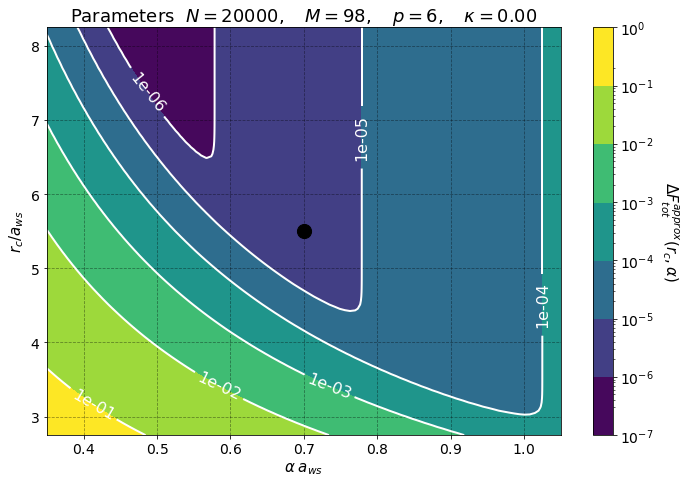

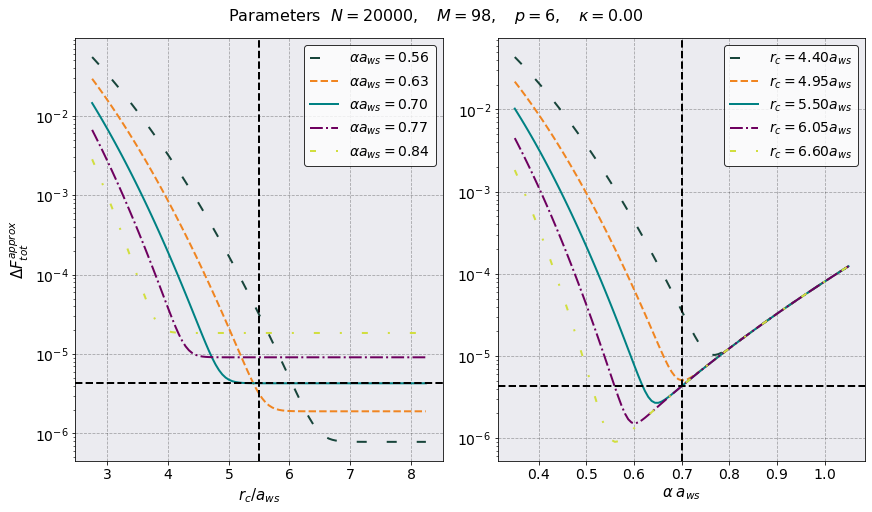

In [2]:
sim = PreProcess(input_file_name)
sim.setup(read_yaml=True)
sim.run(pppm_estimate = True, postprocessing =True)

In [7]:
'{:.6e}'.format(3.9 * sim.parameters.a_ws/(sim.parameters.total_num_ptcls)**(1/3))

'8.913024e-14'

In [30]:
sim.run(timing=True, remove=False, postprocessing=True)



========================== Times Estimates =========================== 

Optimal Green's Function Time: 
0 min 17 sec 200 msec 354 usec 223 nsec 

Time of PP acceleration calculation averaged over 9 steps: 
0 min 0 sec 131 msec 874 usec 786 nsec 

Time of PM acceleration calculation averaged over 9 steps: 
0 min 0 sec 179 msec 877 usec 567 nsec 


Running 10 equilibration and production steps to estimate simulation times



  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single equilibration step averaged over 9 steps: 
0 min 0 sec 317 msec 527 usec 470 nsec 



  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single production step averaged over 9 steps: 
0 min 0 sec 328 msec 60 usec 473 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 52 min 55 sec

Production Time: 4 hrs 33 min 23 sec

Total Run Time: 5 hrs 26 min 18 sec


========================= Filesize Estimates ========================= 


Equilibration:

Checkpoint filesize: 0 GB 0 MB 821 KB 758 bytes
Checkpoint folder size: 0 GB 802 MB 492 KB 240 bytes

Production:

Checkpoint filesize: 0 GB 0 MB 821 KB 758 bytes
Checkpoint folder size: 7 GB 856 MB 826 KB 352 bytes

Total minimum needed space: 8 GB 635 MB 294 KB 592 bytes



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Preprocessing                                  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


==================== Radial Distribution Function ==========

ZeroDivisionError: float division by zero

In [32]:
sim.dsf.no_dumps

# np.fft.fftfreq(1000, sim.dsf.dt * sim.dsf.dump_step)

2

## PostProcessing


In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim
Job directory:  Simulations/bim
PostProcessing directory: 
 Simulations/bim/PostProcessing

Equilibration dumps directory:  Simulations/bim/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/bim/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/bim/Simulation/Equilibration/EquilibrationEnergy_bim.csv
Production Thermodynamics file: 
 Simulations/bim/Simulation/Production/ProductionEnergy_bim.csv


### Thermodynamic Check

Let's make sure that the equilibration phase was $NVT$ and the production phase $NVE$.

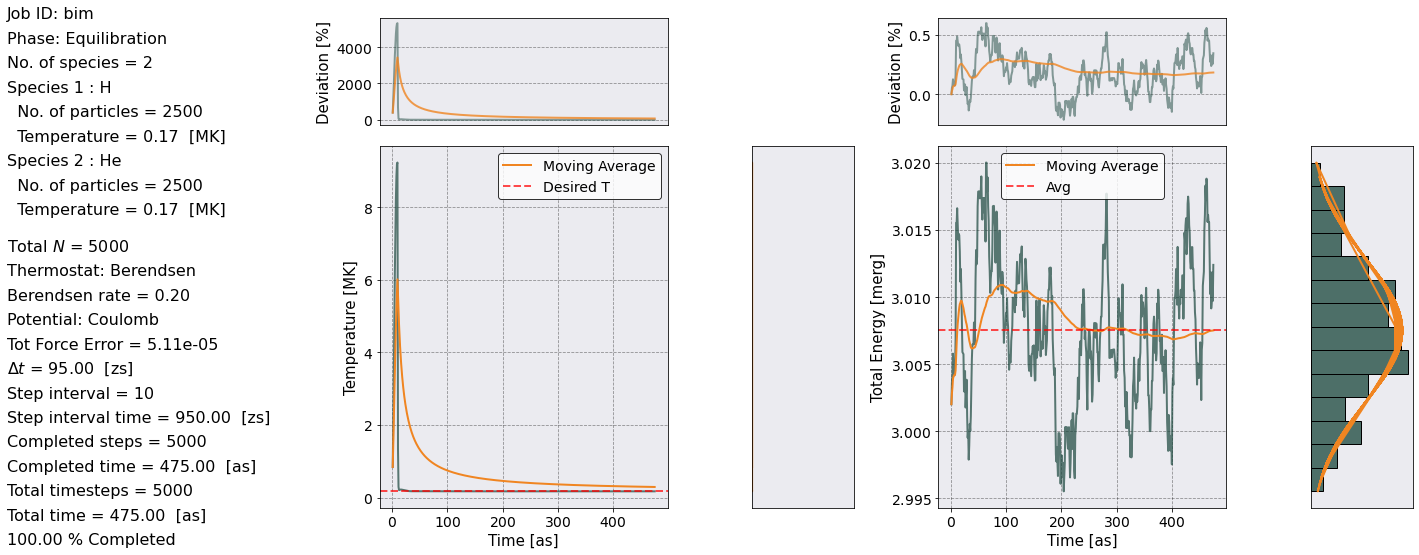

In [4]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='equilibration')


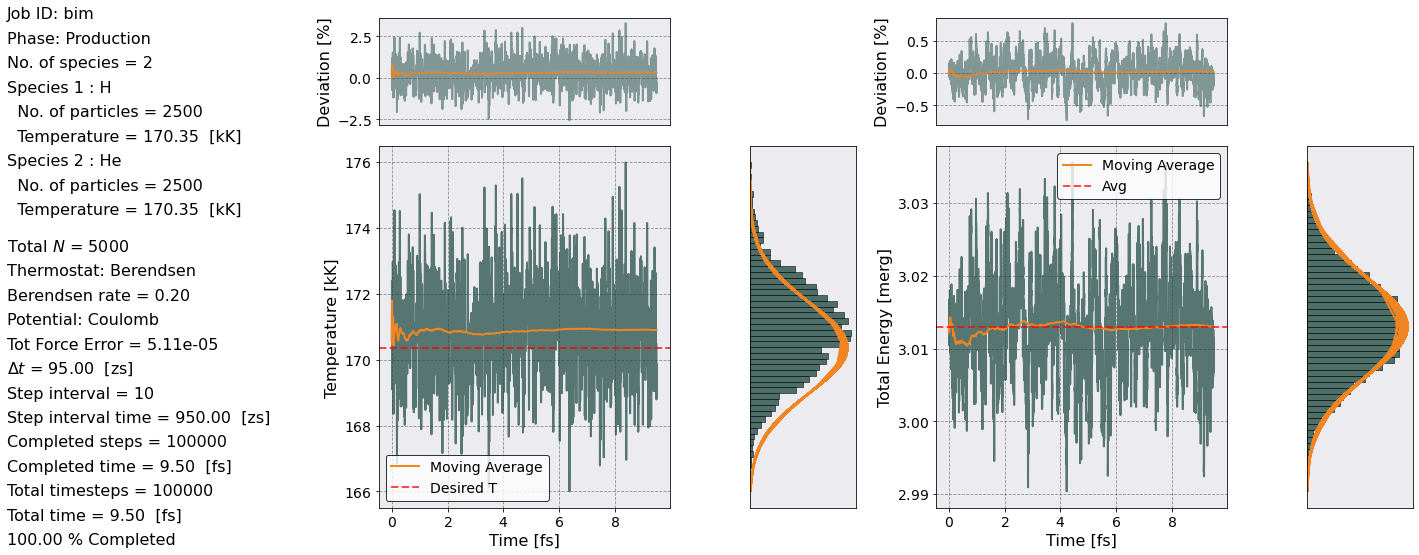

In [5]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')

### Pair Distribution Function

Let's look at $g_{\alpha \beta}(r)$. Just for fun.


Radial Distribution Function Calculation Time: 0 sec 1 msec 353 usec 739 nsec


<AxesSubplot:xlabel='$r / a_{\\rm ws}$'>

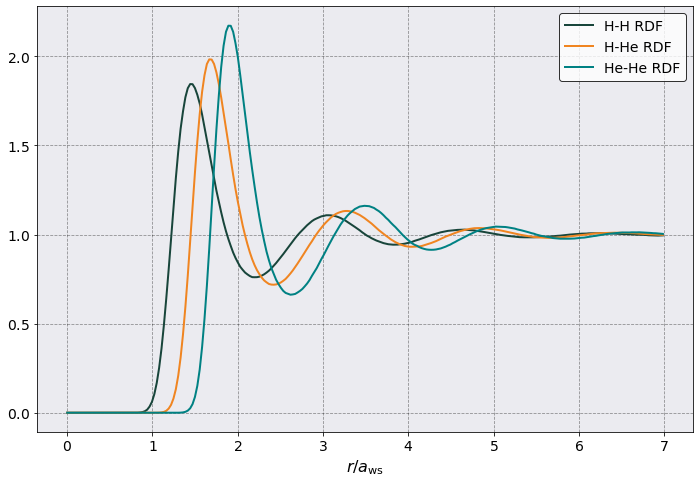

In [6]:
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
postproc.rdf.plot(scaling = postproc.parameters.a_ws, 
                  xlabel = r'$r / a_{\rm ws}$')

### Static Structure Function

Let's calculate $S_{\alpha\beta}(k)$ up to $ka = 5$ and angle average it.

In [7]:
from sarkas.tools.observables import StaticStructureFactor

ssf = StaticStructureFactor()
ssf.no_slices = 4
ssf.angle_averaging = 'full'
ssf.max_ka_value = 5
ssf.setup(postproc.parameters)
ssf.pretty_print()




===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/bim/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/bim/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/bim/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_bim.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.2279 / a_ws = 9.2974e+08 [1/cm]

Angle averaging choice: full
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 12, 12, 12
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	k_max = 4.7377 / a_ws = 1.9324e+10 [1/cm]

Total number of k values to calculate = 2196
No. of unique ka values to calculate = 354


In [8]:
ssf.compute()
ssf.dataframe


Calculating n(k,t) for slice 1/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 2/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 3/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 4/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


n(k,t) Calculation Time: 1 hrs 11 min 33 sec

Calculating S(k) ...


  0%|          | 0/4 [00:00<?, ?it/s]


Static Structure Function Calculation Time: 1 sec 143 msec 886 usec 588 nsec


Inverse Wavelength       H-H                H-He               He-He  \
                   NaN      Mean       Std      Mean       Std      Mean   
0         9.297400e+08  0.602529  0.192241 -0.301900  0.096341  0.151476   
1         1.314851e+09  0.950866  0.520780 -0.477511  0.261661  0.240235   
2         1.610357e+09  0.739990  0.738481 -0.372485  0.372207  0.188129   
3         1.859480e+09  0.752397  0.351244 -0.379395  0.177169  0.192214   
4         2.078962e+09  1.002572  0.228513 -0.506872  0.115638  0.257413   
..                 ...       ...       ...       ...       ...       ...   
349       1.785972e+10  1.192680  0.661692  0.436384  0.554023  1.359468   
350       1.826649e+10  1.237796  0.726700  0.405055  0.520392  1.127594   
351       1.831376e+10  1.351196  0.827004  0.469020  0.587705  1.221888   
352       1.880283e+10  1.242406  0.689684  0.364108  0.486653  1.086201   
353       1.932428e+10  1.315648  1.301362  0.305602  0.896752  0.940871   

               
          Std  
0    0.048380  
1    0.131608  
2    0.187956  
3    0.089757  
4    0.058941  
..        ...  
349  0.742470  
350  0.610901  
351  0.728822  
352  0.610369  
353  1.066535  

[354 rows x 7 columns]

<AxesSubplot:xlabel='$ka$'>

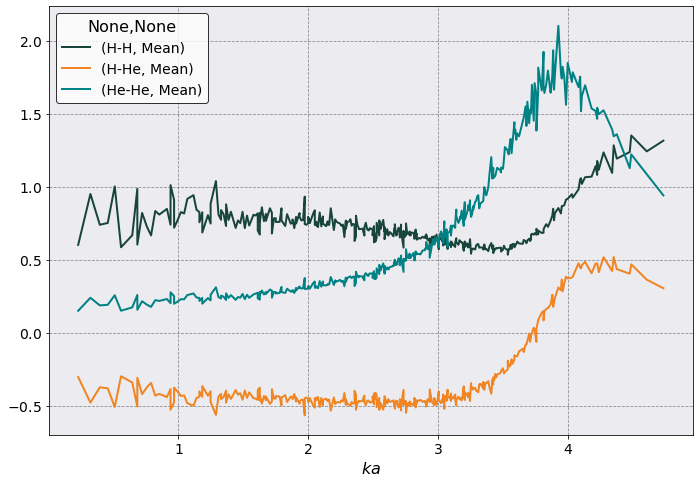

In [9]:
ssf.plot(
    scaling = 1 /ssf.a_ws,
    y= [('H-H', 'Mean'), ('H-He', 'Mean'), ('He-He', 'Mean')], 
    xlabel = r'$ka$')

## Interdiffusion

The interdiffusion coefficient is calculated by the Green-Kubo relation 

$$ D_{12} = \frac{\mathcal{J}}{3Nx_1x_2} \int_0^\infty dt {\rm{{ACF}_{ID}}} = \frac{\mathcal{J}}{3Nx_1x_2} \int_0^\infty dt \langle \mathbf{j}(0) \cdot \mathbf{j}(t) \rangle, $$

where $\mathcal{J}$ is the thermodynamic factor

$$ \mathcal{J} = \frac{x_1x_2}{S_{cc}(k = 0)} $$

and $S_{cc}(k)$ is the concentration-concentration structure factor that can be decomposed into partial structure factors as

$$ S_{cc}(k) = x_1x_2[x_2S_{11}(k) + x_1S_{22}(k) - 2\sqrt{x_1x_2}S_{12}(k)]. $$

Calculating the interdiffusion coefficient $D_{12}$ is two-fold in that we must compute the auto-correlation function $\rm{{ACF}_{ID}}$ and the thermodynamic factor $\mathcal J$.

We will calculate $\mathcal J$ first by fitting the following function to $S_{\alpha\beta}(k)$

In [10]:
# Define fitting functions
from scipy.optimize import curve_fit

def poly_fit(x, a, b, c):
    return a*x**2 + b*x + c

def lin_fit(x, a, b):
    return a*x + b

def inv_fit(x, a, b, c):
    return a*np.exp(b*x) + c

As you can see from above $S_{\alpha\beta}(k)$ are pretty noisy. Therefore we choose only those $ka$ values for which we have averaged more than three $S_{\alpha\beta}(k)$.

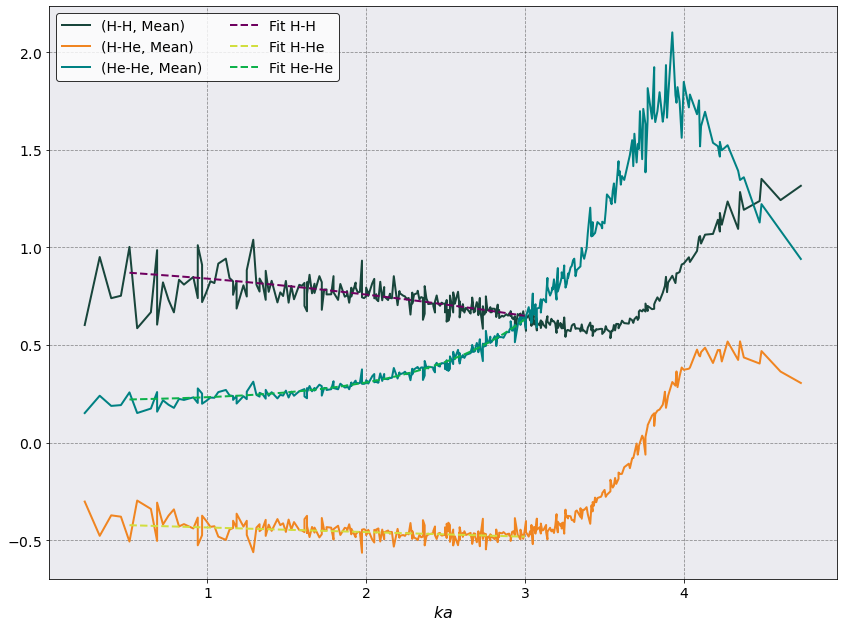

In [11]:
# Create masks
mask = ssf.k_counts > 3
ka_values_full = ssf.ka_values[mask]

ka_mask = ka_values_full < 3.0
ka_values = ka_values_full[ka_mask]

# Remake the plot        
fig, ax = plt.subplots(1,1, figsize = (12,9))
ssf.plot(
    scaling = 1 /ssf.a_ws,
    y= [('H-H', 'Mean'), ('H-He', 'Mean'), ('He-He', 'Mean')], 
    xlabel = r'$ka$', ax = ax)

# H-H Fit and plot
sk_array_full = ssf.dataframe[("H-H", 'Mean')].to_numpy()
sk_array = sk_array_full[mask]
poptH, pcov = curve_fit(poly_fit, ka_values, sk_array[ka_mask])
ax.plot(ka_values, poly_fit(ka_values, *poptH), ls='--', label = 'Fit H-H')

# H-He Fit and plot
sk_array_full = ssf.dataframe[("H-He", 'Mean')].to_numpy()
sk_array = sk_array_full[mask]
poptHHe, pcov = curve_fit(lin_fit, ka_values, sk_array[ka_mask])
ax.plot(ka_values, lin_fit(ka_values, *poptHHe),  ls='--', label = 'Fit H-He')

# He-He Fit and plot
sk_array_full = ssf.dataframe[("He-He", 'Mean')].to_numpy()
sk_array = sk_array_full[mask]
poptHe, pcov = curve_fit(inv_fit, ka_values, sk_array[ka_mask])
ax.plot(ka_values, inv_fit(ka_values, *poptHe),  ls='--', label = 'Fit He-He')

ax.legend(ncol =2 )

Pretty good, right? Now for the thermodynamic factor

In [12]:
x1, x2 = ssf.species_concentrations
Scc_k0 = x1*x2*(x2*inv_fit(0, *poptHe) + x1*poly_fit(0, *poptH) - 2*np.sqrt(x1*x2)*lin_fit(0, *poptHHe))
Therm_factor = x1*x2/Scc_k0
print('J = {:.4f}'.format(Therm_factor) )

J = 1.0354


The value is ~ 1 which is what Hansen *et al.* assumed. Therefore we won't use it below.

### Transport Coefficients in Sarkas
Calculating transport coefficients is easy once the ``TransportCoefficient`` class from the ``sarkas.tools.transport`` subpackage is imported. 

Interdiffusion is a static method of ``TransportCoefficient``. The inputs are 

        Parameters
        ----------
        params : sarkas.base.Parameters
            Simulation's parameters.
        
        phase : str, optional
            Phase to compute. Default = 'production'.
        
        no_slices : int, optional
            Number of slices of the simulation. Default = 1.
        
        time_averaging: bool, optional
            Flag for species diffusion flux time averaging. Default = False.

        timesteps_to_skip: int, optional
            Timestep interval for species diffusion flux time averaging. Default = 100

        plot : bool, optional
            Flag to plot transport coefficient with corresponding autocorrelation function. Default = True.

        figname : str, optional
            Name with which to save the file. It automatically saves it in the correct directory.
        
        show : bool, optional
            Flag for prompting plot to screen when using IPython kernel. Default = False.

        **kwargs:
            Arguments to pass :meth:`sarkas.tools.observables.FluxAutoCorrelationFunction`

The method returns a `pandas.DataFrame`

        Returns
        -------
        coefficient : pandas.DataFrame
            Pandas dataframe containing the value of the transport coefficient as a function of integration
            time.

The parameter ``params`` is required as it contains all the relevant information of the simulation. This will be passed to the appropriate observable for the calculation of its autocorrelation function. All the other parameters are optional. 

Notice the parameter ``no_slices``. This represents the number of divisions in which we want to divide the full length of the time series. For each of these ``slices`` the method will compute the ACF and then integrate it to get the transport coefficient. The transport coefficient of each slice will be stored as a column of a `pandas.DataFrame` called ``coefficient``. The first column of ``coefficient`` corresponds to the time in sec of each timestep of the slice. Once the calculation has been completed for all the slices, Sarkas will calculate the average and standard deviation over the number of slices and append them as columns to ``coefficient``. 

The option ``plot=True`` will make a figure with two plots. On the left the ACF as a function of time and on the right a plot of the transport coefficient as a function of time with the corresponding errorband.

In [13]:
from sarkas.tools.transport import TransportCoefficient
from sarkas.tools.observables import DiffusionFlux


In [14]:
# Compute the diffusion flux by dividing the simulations into 4 smaller simulations
jc_acf = DiffusionFlux()
jc_acf.no_slices = 4
jc_acf.setup(postproc.parameters)
jc_acf.parse()


Data file not found! 
 Simulations/bim/PostProcessing/DiffusionFlux/Production/DiffusionFlux_bim.h5

Computing Observable now ...

Calculating diffusion flux and its acf for slice 1/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 2/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 3/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 4/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Diffusion Flux and its ACF Calculation Time: 0 hrs 0 min 13 sec


In [15]:
# Let's look at it 
jc_acf.dataframe

Time Diffusion Flux 0                              \
               NaN                X             Y             Z   
               NaN          slice 0       slice 0       slice 0   
0     0.000000e+00     1.993921e-31 -8.374467e-31 -9.471123e-32   
1     9.500000e-19     3.019202e-17  2.536946e-17  3.126571e-18   
2     1.900000e-18     6.201764e-17  4.934061e-17  4.431807e-18   
3     2.850000e-18     9.485616e-17  7.177066e-17  3.852522e-18   
4     3.800000e-18     1.280001e-16  9.259796e-17  1.410964e-18   
...            ...              ...           ...           ...   
2495  2.370250e-15     2.099584e-16 -1.233453e-16  1.169715e-16   
2496  2.371200e-15     2.029564e-16 -1.575947e-16  9.064110e-17   
2497  2.372150e-15     1.950846e-16 -1.901676e-16  6.264069e-17   
2498  2.373100e-15     1.862069e-16 -2.207674e-16  3.393836e-17   
2499  2.374050e-15     1.762159e-16 -2.491263e-16  5.591958e-18   

     Diffusion Flux ACF 0                                            \
                        X             Y             Z         Total   
                  slice 0       slice 0       slice 0       slice 0   
0            1.007583e+16  1.203821e+16  1.236130e+16  3.447534e+16   
1            1.002378e+16  1.198172e+16  1.231345e+16  3.431895e+16   
2            9.862379e+15  1.180764e+16  1.216098e+16  3.383100e+16   
3            9.595230e+15  1.151956e+16  1.190681e+16  3.302159e+16   
4            9.228288e+15  1.112338e+16  1.155578e+16  3.190745e+16   
...                   ...           ...           ...           ...   
2495         1.632078e+15 -1.460322e+15  1.953766e+13  1.912935e+14   
2496         1.192166e+15 -1.172756e+15  1.283863e+13  3.224903e+13   
2497         7.702882e+14 -8.327628e+14  6.092005e+12 -5.638260e+13   
2498         3.714255e+14 -4.412301e+14  1.220581e+12 -6.858406e+13   
2499         6.291456e+02  1.048576e+03  1.048576e+03  2.726298e+03   

     Diffusion Flux 0                ...                              \
                    X             Y  ...             Z                 
              slice 1       slice 1  ...          Mean           Std   
0        1.650410e-16 -2.750060e-16  ...  1.844145e-16  2.502405e-16   
1        1.526589e-16 -2.982007e-16  ...  1.755829e-16  2.573765e-16   
2        1.391056e-16 -3.185411e-16  ...  1.648935e-16  2.600980e-16   
3        1.244862e-16 -3.358978e-16  ...  1.524510e-16  2.577789e-16   
4        1.089811e-16 -3.501835e-16  ...  1.383516e-16  2.500423e-16   
...               ...           ...  ...           ...           ...   
2495    -4.095864e-16 -3.794951e-16  ...  1.742481e-16  2.290051e-16   
2496    -3.848219e-16 -3.929576e-16  ...  1.608045e-16  2.622822e-16   
2497    -3.566792e-16 -4.045290e-16  ...  1.459626e-16  2.947331e-16   
2498    -3.258457e-16 -4.136707e-16  ...  1.301416e-16  3.242193e-16   
2499    -2.931044e-16 -4.199792e-16  ...  1.137422e-16  3.492636e-16   

     Diffusion Flux ACF 0                                            \
                        X                           Y                 
                     Mean           Std          Mean           Std   
0            1.105215e+16  1.515083e+15  1.118884e+16  9.371650e+14   
1            1.098941e+16  1.508856e+15  1.113122e+16  9.375705e+14   
2            1.080248e+16  1.484616e+15  1.096279e+16  9.332193e+14   
3            1.049520e+16  1.442999e+15  1.068694e+16  9.241801e+14   
4            1.007394e+16  1.385101e+15  1.030925e+16  9.105861e+14   
...                   ...           ...           ...           ...   
2495         5.184566e+14  5.599803e+15  2.504561e+15  2.028802e+16   
2496         2.136609e+14  5.308954e+15  2.558052e+15  2.002863e+16   
2497        -4.796186e+13  5.025962e+15  2.599889e+15  1.967793e+16   
2498        -2.627152e+14  4.758238e+15  2.630386e+15  1.923399e+16   
2499        -4.277301e+14  4.513825e+15  2.649631e+15  1.869661e+16   

                                                              
             

Notice that there is a column `Diffusion Flux 0` and `Diffusion Flux ACF 0` for each slice. For the transport coefficient I will use `Diffusion Flux ACF 0`.



===================== Interdiffusion Coefficient ===================== 

Data saved in: 
 Simulations/bim/PostProcessing/DiffusionFlux/Production/InterDiffusion_bim.h5

No. of slices = 4
No. dumps per slice = 250
Time interval of autocorrelation function = 2.3750e-15 [s] ~ 397 w_p T


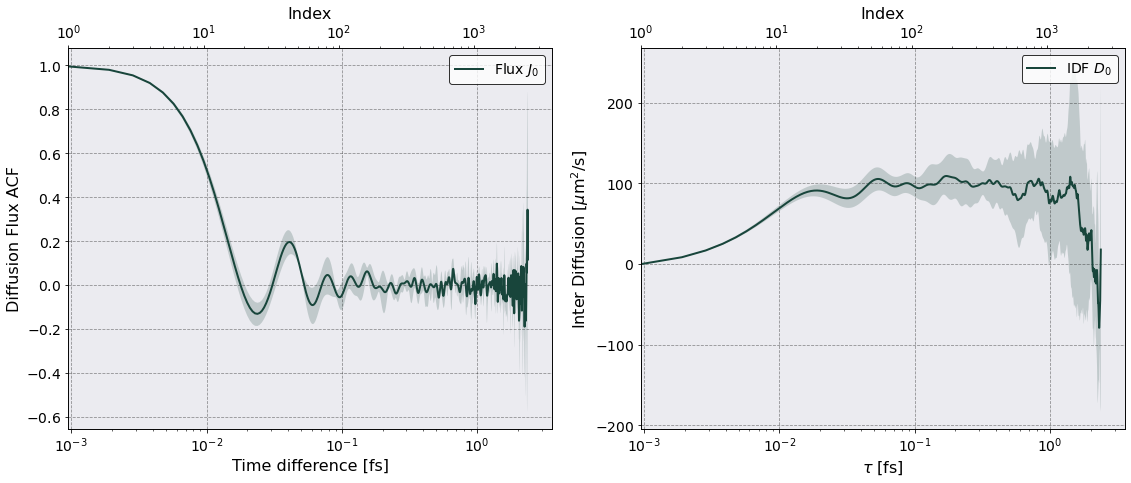

In [16]:
aws = postproc.parameters.a_ws
vaa = postproc.parameters.hydrodynamic_frequency
norm = 1/(vaa * aws**2 )

interdiffusion = TransportCoefficient.interdiffusion(
        postproc.parameters, 
        compute_acf = False, # This option is to avoid recalculating the ACF in case you already have it. 
        # If False reads it in, but the no_slices should be the same otherwise you get an error.
        no_slices = 4,
        plot = True,
        verbose = False)

# Note the info printed to screen

In [17]:
# Let's look at what we have
interdiffusion

Time Inter Diffusion Flux 0                                    \
               NaN                slice 0       slice 1   slice 2   slice 3   
0     0.000000e+00               0.000000  0.000000e+00  0.000000  0.000000   
1     9.500000e-19               0.000000  0.000000e+00  0.000000  0.000000   
2     1.900000e-18               0.000009  8.167529e-06  0.000009  0.000008   
3     2.850000e-18               0.000017  1.624232e-05  0.000018  0.000016   
4     3.800000e-18               0.000026  2.413461e-05  0.000026  0.000024   
...            ...                    ...           ...       ...       ...   
2495  2.370250e-15               0.000067 -4.542383e-06 -0.000239  0.000227   
2496  2.371200e-15               0.000067 -2.805213e-06 -0.000240  0.000232   
2497  2.372150e-15               0.000067 -1.052381e-06 -0.000240  0.000236   
2498  2.373100e-15               0.000067  7.441171e-07 -0.000241  0.000240   
2499  2.374050e-15               0.000067  2.608491e-06 -0.000241  0.000244   

                              
          Mean           Std  
0     0.000000  0.000000e+00  
1     0.000000  0.000000e+00  
2     0.000008  3.826732e-07  
3     0.000017  7.656943e-07  
4     0.000025  1.148443e-06  
...        ...           ...  
2495  0.000012  1.937744e-04  
2496  0.000014  1.957540e-04  
2497  0.000016  1.975726e-04  
2498  0.000017  1.992226e-04  
2499  0.000018  2.006965e-04  

[2500 rows x 7 columns]

As mentioned the InterDiffusion is calculated for each slice and then averaged. The left plot above shows the mean of 4 slices of the Diffusion Flux ACF with its standard deviation as the shaded area.

Let's now plot this and compare with Hansen *et al.* result.

[None,
 Text(0.5, 0, 'Time [fs]'),
 Text(0.5, 1.0, 'H-He Interdiffusion $\\Gamma = 40$')]

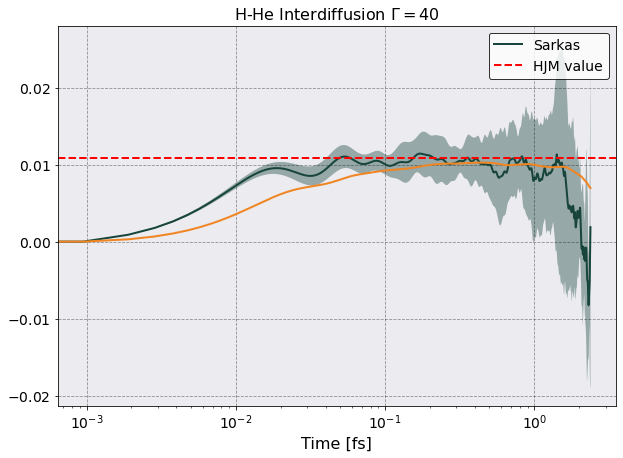

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(
    interdiffusion["Time"]*1e15,
    interdiffusion[("Inter Diffusion Flux 0","Mean")] * norm , 
    label = 'Sarkas')
ax.plot(
    interdiffusion["Time"]*1e15, 
    norm * interdiffusion[("Inter Diffusion Flux 0","Mean")].expanding().mean())

ax.fill_between( 
    interdiffusion["Time"].iloc[:,0]*1e15, # I don't understand why I need iloc here but not above
    (interdiffusion[("Inter Diffusion Flux 0","Mean")] - interdiffusion[("Inter Diffusion Flux 0","Std")])*norm,
    (interdiffusion[("Inter Diffusion Flux 0","Mean")] + interdiffusion[("Inter Diffusion Flux 0","Std")])*norm,
    alpha = 0.4)

ax.axhline(0.0109, color = 'r', ls = '--', label='HJM value')
ax.legend()
ax.set(xscale = 'log', xlabel = 'Time [fs]', title = r'H-He Interdiffusion $\Gamma = 40$')
